# Copyright 2020 Google LLC. Double-click here for license information.
Licensed under the Apache License, Version 2.0 (the "License");
you may not use this file except in compliance with the License.
You may obtain a copy of the License at

https://www.apache.org/licenses/LICENSE-2.0

Unless required by applicable law or agreed to in writing, software
distributed under the License is distributed on an "AS IS" BASIS,
WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
See the License for the specific language governing permissions and
limitations under the License.

Yann LeCun and Corinna Cortes hold the copyright of MNIST dataset,
which is a derivative work from original NIST datasets. 
MNIST dataset is made available under the terms of the 
Creative Commons Attribution-Share Alike 3.0 license.

Learning Objectives:
After doing this Colab, you'll know how to do the following:

Understand the classic MNIST problem.
Create a deep neural network that performs multi-class classification.
Tune the deep neural network.
This exercise introduces image classification with machine learning.

The Dataset
This MNIST dataset contains a lot of examples:

The MNIST training set contains 60,000 examples.
The MNIST test set contains 10,000 examples.
Each example contains a pixel map showing how a person wrote a digit.

Each example in the MNIST dataset consists of:

A label specified by a rater. Each label must be an integer from 0 to 9. For example, in the preceding image, the rater would almost certainly assign the label 1 to the example.
A 28x28 pixel map, where each pixel is an integer between 0 and 255. The pixel values are on a gray scale in which 0 represents white, 255 represents black, and values between 0 and 255 represent various shades of gray.
This is a multi-class classification problem with 10 output classes, one for each digit.

In [1]:
# Import relevant modules
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras import layers
from matplotlib import pyplot as plt

# The following lines adjust the granularity of reporting. 
pd.options.display.max_rows = 10
pd.options.display.float_format = "{:.1f}".format

# The following line improves formatting when ouputting NumPy arrays.
np.set_printoptions(linewidth = 200)

In [2]:
print(tf.__version__)

2.6.0


Load the dataset
tf.keras provides a set of convenience functions for loading well-known datasets. Each of these convenience functions does the following:

Loads both the training set and the test set.
Separates each set into features and labels.
The relevant convenience function for MNIST is called mnist.load_data():

In [3]:
(x_train, y_train),(x_test, y_test) = tf.keras.datasets.mnist.load_data()

In [4]:
# Output example #2917 of the training set.
x_train[2917]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0, 127, 100, 156, 239, 224, 177, 213, 159,  70,  13,   0,   0

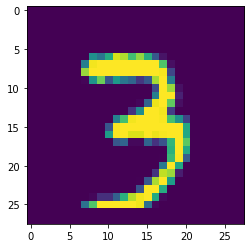

In [5]:
# Alternatively, you can call matplotlib.pyplot.imshow to interpret the preceding numeric array as an image.
# Use false colors to visualize the array.
plt.imshow(x_train[2917])

In [6]:
# map each feature value from its current representation (an integer between 0 and 255) 
#to a floating-point value between 0 and 1.0.
x_train_normalized = x_train / 255.0
x_test_normalized = x_test / 255.0

In [8]:
# Define the plotting function
def plot_curve(epochs, hist, list_of_metrics):
    """Plot a curve of one or more classification metrics vs. epoch."""  
    # list_of_metrics should be one of the names shown in:
    # https://www.tensorflow.org/tutorials/structured_data/imbalanced_data#define_the_model_and_metrics  

    plt.figure()
    plt.xlabel("Epoch")
    plt.ylabel("Value")

    for m in list_of_metrics:
        x = hist[m]
        plt.plot(epochs[1:], x[1:], label=m)

    plt.legend()

print("Loaded the plot_curve function.")

Loaded the plot_curve function.


The create_model function defines the topography of the deep neural net, specifying the following:

The number of layers in the deep neural net.
The number of nodes in each layer.
Any regularization layers.
The create_model function also defines the activation function of each layer. The activation function of the output layer is softmax, which will yield 10 different outputs for each example. Each of the 10 outputs provides the probability that the input example is a certain digit.

In [13]:
def create_model(my_learning_rate):
    """Create and compile a deep neural net."""

    # All models in this course are sequential.
    model = tf.keras.models.Sequential()

    # The features are stored in a two-dimensional 28X28 array. 
    # Flatten that two-dimensional array into a a one-dimensional 
    # 784-element array.
    model.add(tf.keras.layers.Flatten(input_shape=(28, 28)))

    # Define the first hidden layer.   
    model.add(tf.keras.layers.Dense(units=256, activation='relu'))
    
    # Define the second hidden layer?   
    model.add(tf.keras.layers.Dense(units=128, activation='relu'))

    # Define a dropout regularization layer. 
    model.add(tf.keras.layers.Dropout(rate=0.3))

    # Define the output layer. The units parameter is set to 10 because
    # the model must choose among 10 possible output values (representing
    # the digits from 0 to 9, inclusive).
    #
    # Don't change this layer.
    model.add(tf.keras.layers.Dense(units=10, activation='softmax'))     

    # Construct the layers into a model that TensorFlow can execute.  
    # Notice that the loss function for multi-class classification
    # is different than the loss function for binary classification.  
    model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=my_learning_rate),
                loss="sparse_categorical_crossentropy",
                metrics=['accuracy'])

    return model    


def train_model(model, train_features, train_label, epochs,
                batch_size=None, validation_split=0.1):
    """Train the model by feeding it data."""

    history = model.fit(x=train_features, y=train_label, batch_size=batch_size,
                      epochs=epochs, shuffle=True, 
                      validation_split=validation_split)

    # To track the progression of training, gather a snapshot
    # of the model's metrics at each epoch. 
    epochs = history.epoch
    hist = pd.DataFrame(history.history)

    return epochs, hist    

Epoch 1/50
12/12 [==============================] - 0s 19ms/step - loss: 1.0615 - accuracy: 0.6747 - val_loss: 0.3527 - val_accuracy: 0.8963
Epoch 2/50
12/12 [==============================] - 0s 14ms/step - loss: 0.3736 - accuracy: 0.8896 - val_loss: 0.2458 - val_accuracy: 0.9288
Epoch 3/50
12/12 [==============================] - 0s 14ms/step - loss: 0.2607 - accuracy: 0.9232 - val_loss: 0.1878 - val_accuracy: 0.9434
Epoch 4/50
12/12 [==============================] - 0s 13ms/step - loss: 0.1994 - accuracy: 0.9410 - val_loss: 0.1523 - val_accuracy: 0.9544
Epoch 5/50
12/12 [==============================] - 0s 14ms/step - loss: 0.1657 - accuracy: 0.9504 - val_loss: 0.1346 - val_accuracy: 0.9592
Epoch 6/50
12/12 [==============================] - 0s 15ms/step - loss: 0.1389 - accuracy: 0.9592 - val_loss: 0.1238 - val_accuracy: 0.9637
Epoch 7/50
12/12 [==============================] - 0s 15ms/step - loss: 0.1189 - accuracy: 0.9651 - val_loss: 0.1122 - val_accuracy: 0.9658
Epoch 8/50
12

[0.08209041506052017, 0.9815999865531921]

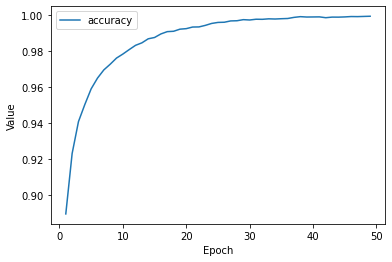

In [14]:
# The following variables are the hyperparameters.
learning_rate = 0.003
epochs = 50
batch_size = 4000
validation_split = 0.2

# Establish the model's topography.
my_model = create_model(learning_rate)

# Train the model on the normalized training set.
epochs, hist = train_model(my_model, x_train_normalized, y_train, 
                           epochs, batch_size, validation_split)

# Plot a graph of the metric vs. epochs.
list_of_metrics_to_plot = ['accuracy']
plot_curve(epochs, hist, list_of_metrics_to_plot)

# Evaluate against the test set.
print("\n Evaluate the new model against the test set:")
my_model.evaluate(x=x_test_normalized, y=y_test, batch_size=batch_size)